In [1]:
!wget 'http://www.gutenberg.org/cache/epub/2000/pg2000.txt'

--2020-04-01 20:02:37--  http://www.gutenberg.org/cache/epub/2000/pg2000.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2198927 (2.1M) [text/plain]
Saving to: ‘pg2000.txt’

pg2000.txt          100%[===================>]   2.10M   194KB/s    in 13s     

2020-04-01 20:02:51 (167 KB/s) - ‘pg2000.txt’ saved [2198927/2198927]



In [64]:
import sys
import os

## Agrego path para importar punto 5
cur_path = os.path.dirname(sys.argv[0])
new_path = os.path.relpath('../5/', cur_path)
sys.path.insert(0, new_path)

import tokenizer_cinco

t = tokenizer_cinco.Tokenizer(dir='pg2000.txt')
t.discovery_dir()
terms = t.get_terms()

### Ejecicio 7

7. En este ejercicio se propone verificar la predicción de ley de Zipf. Para ello, descargue desde Project Gutenberg el texto del Quijote de Cervantes y escriba un programa que extraiga los términos y calcule sus
frecuencias. Calcule la curva de ajuste utilizando la función Polyt del módulo NymPy. Con los datos
crudos y los estimados graque en la notebook ambas distribuciones (haga 2 gráficos, uno en escala lineal y
otro en log-log). ¿Cómo se comporta la predicción? ¿Qué conclusiones puede obtener?

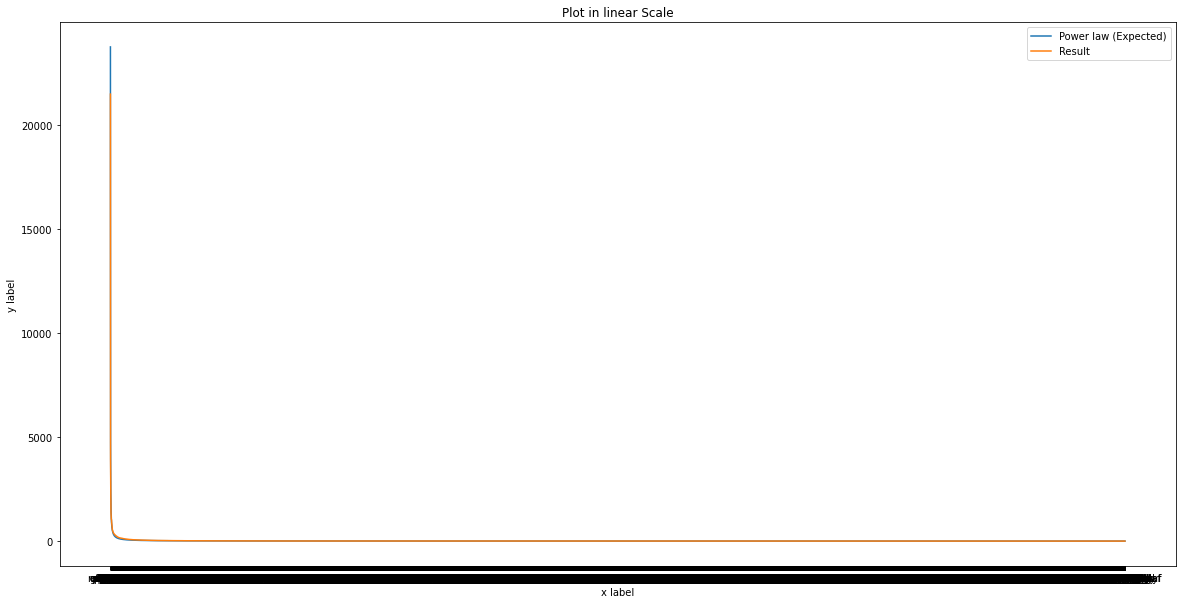

In [0]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

xterms = {t[0]: t[1]['all'] for t in terms.items()}
exp = [ (1/i)*len(xterms) for i in range(1, len(xterms)+1)]

fig, ax = plt.subplots()  # Create a figure and an axes.
fig.set_size_inches(20, 10)
ax.plot(list(xterms), exp, label='Power law (Expected)')  # Plot some data on the axes.
ax.plot(list(xterms), list(xterms.values()), label='Result')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Plot in linear Scale")  # Add a title to the axes.
ax.legend()
fig.show()

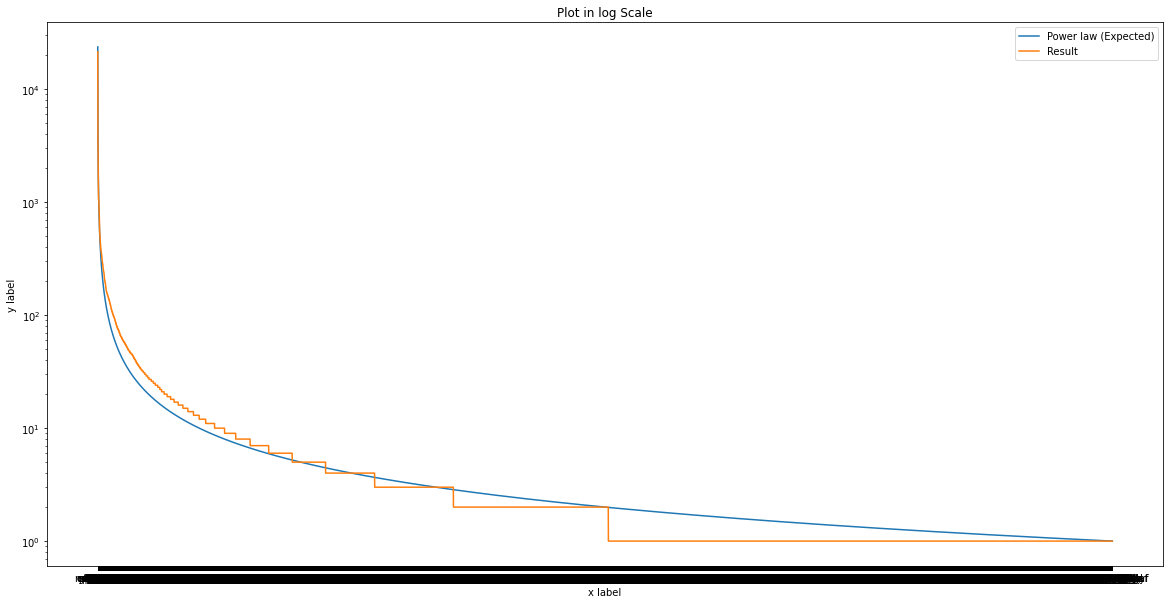

In [0]:
import numpy as np
from matplotlib import pyplot as plt

xterms = {t[0]: t[1]['all'] for t in terms.items()} 

exp = [ (1/i)*len(xterms) for i in range(1, len(xterms)+1)]
fig, ax = plt.subplots()  # Create a figure and an axes.
fig.set_size_inches(20, 10)
ax.set_yscale('log')
ax.plot(list(xterms), exp, label='Power law (Expected)')  # Plot some data on the axes.
ax.plot(list(xterms), list(xterms.values()), label='Result')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Plot in log Scale")  # Add a title to the axes.
ax.legend()
fig.show()

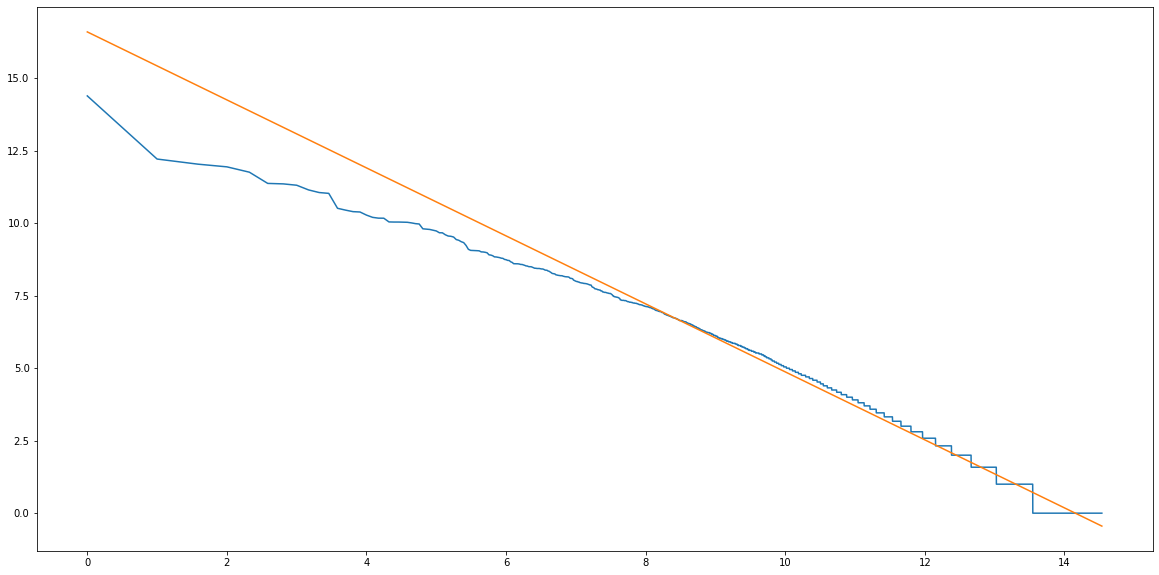

In [0]:
from sklearn.metrics import r2_score
import numpy as np
 
# si x e y  son los datos originales obtenidos del  procesamiento  del quijote, entonces
 
xlog = np.log2(list(range(1, len(xterms)+1)))
ylog = np.log2(list(xterms.values()))
 
ajuste = np.polyfit(xlog, ylog, 1)
 
rectaAjusteEc = np.poly1d(ajuste)
y_pred = rectaAjusteEc(xlog)
 
r2 = r2_score(ylog, y_pred) #calcula el coeficiente de determinación para verificar la bondad del ajuste
plt.figure(figsize=(20,10))
plt.plot(xlog, ylog, xlog, y_pred)

In [0]:
print(f'Bondad de Ajuste: {r2}')

Bondad de Ajuste: 0.9740081545660374


### Conclusiones

Podemos observar que la **power law** se acercó mucho al resultado esperado (lo podemos corroborar observando r2_score() el cual se obtuvo un valor de 0.97, donde 1.0 es el mejor score posible), esto no se llega a apreciar en la escala lineal, pero si el escala logarítmica.  

### Ejecicio 8

8. Usando los datos del ejercicios anterior y de acuerdo a la ley de Zipf, calcule la proporción del total de
términos para aquellos que tienen frecuencia f = 100; 1000; 10000. Verifique respecto de los valores reales. ¿Qué conclusión puede obtener?

In [0]:
exp = [ (1/i)*len(xterms) for i in range(1, len(xterms)+1)] # Zipf
real = [ xterms[i] for i in xterms] # Valor Real

print(f"Valor Esperado: {exp.count(100.0)/len(xterms)}, Valor Real: {real.count(100)/len(xterms)}")
print(f"Valor Esperado: {exp.count(1000.0)/len(xterms)}, Valor Real: {real.count(1000)/len(xterms)}")
print(f"Valor Esperado: {exp.count(10000.0)/len(xterms)}, Valor Real: {real.count(10000)/len(xterms)}")

Valor Esperado: 0.0, Valor Real: 0.0004211590296495957
Valor Esperado: 0.0, Valor Real: 0.0
Valor Esperado: 0.0, Valor Real: 0.0


#### Conclusiones

Podemos concluir que en 2 de los casos los valores obtenidos fueron iguales respecto a lo esperado.


### Ejecicio 9

Para el texto del ejercicio 5 procese cada palabra en orden y calcule los pares (cant de términos totales procesados, cant de términos unicos). Verique en que medida satisface la ley de Heaps. Grafique en la notebook los ajustes variando los parámetros de la expresión.

In [48]:
from json import load
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

with open('log_terms_porter.json', 'r') as myfile:
  l_porter = load(myfile)

with open('log_terms_lancaster.json', 'r') as myfile:
  l_lancaster = load(myfile)

def get_curve(n_terms, n_tokens):
    func = lambda x, a, b: a * (x**b) 
    popt, pcov = curve_fit(func, n_tokens, n_terms) #calcula los coeficientes de la función
    return func(n_tokens, *popt)

def f(b, k):
  x = np.linspace(0,10000,adata.size)
  y = k*x**b
  return x, y

def add_plot(b, k, ax):
  r = f(b, k)
  ax.plot(r[0], r[1], label=f'Heap\'s Law. K={k}, b={b}') 

### Resultados - Porter

Verifique en que medida satisface la ley de Heaps. Grafique en la notebook los ajustes variando los parámetros de la expresión.

/Users/mr.grassho/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


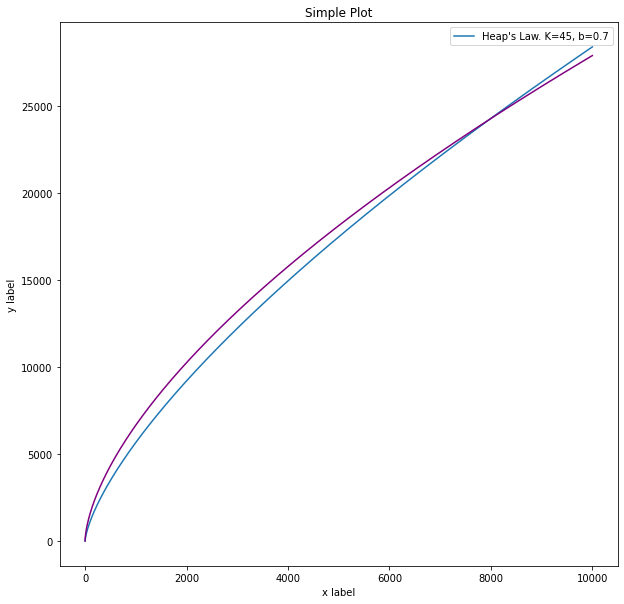

In [49]:
import matplotlib.pyplot as plt
import numpy as np

adata = get_curve(l_porter,    list(range(1, len(l_porter)+1)))

fig, ax = plt.subplots()  # Create a figure and an axes.
fig.set_size_inches(10, 10)
add_plot(0.7,45, ax)
ax.plot(np.linspace(0,10000,adata.size), adata, color='purple')
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()
fig.show()

r = f(0.7,45)
r2 = r2_score(adata, r[1])

Tomamos de base T > 10^5 para los parametros b = 0.7 and k = 45.

In [51]:
print(f" Bondad de Ajuste: {r2}")

 Bondad de Ajuste: 0.990761348554853


### Resultados - Lancaster

Verifique en que medida satisface la ley de Heaps. Grafique en la notebook los ajustes variando los parámetros de la expresión.

/Users/mr.grassho/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


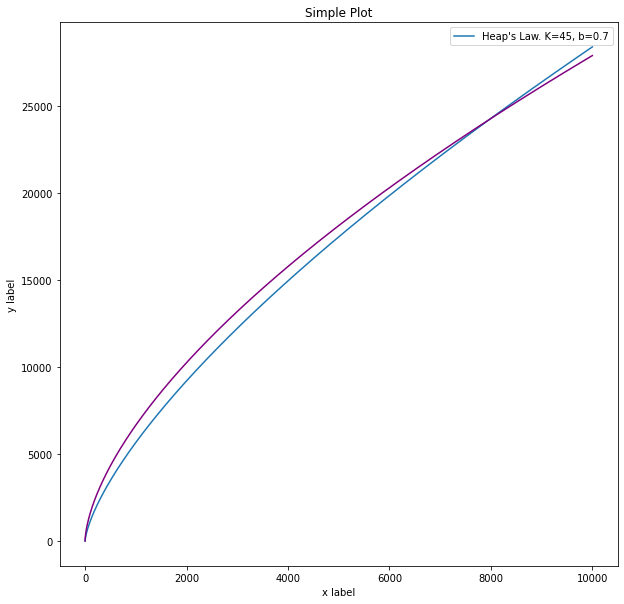

In [41]:
import matplotlib.pyplot as plt
import numpy as np

adata = get_curve(l_lancaster, list(range(1, len(l_lancaster)+1)))

fig, ax = plt.subplots()  # Create a figure and an axes.
fig.set_size_inches(10, 10)
add_plot(0.7,45, ax)
ax.plot(np.linspace(0,10000,adata.size), adata, color='purple')
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()
fig.show()

Tomamos de base T > 10^5 para los parametros b = 0.7 and k = 45.

In [52]:
print(f" Bondad de Ajuste: {r2}")

 Bondad de Ajuste: 0.990761348554853


#### Conclusion 

Podemos ver que los datos no varian según el stemmer utilizado. Además podemos observar que utilizando los parametros señalados obtuvimos una muy buena aproximación utilizando la Ley de Heaps.